                                                          UJIAN AKHIR SEMESTER PROYEK DATA SAINS DAN ANALISIS

Nama                  : Muhammad Raihan Dawwami & Muhammad Zidan Nugraha

NIM                   : 1519622064 & 1519622062

Prodi                 : Sistem dan Teknologi Informasi

Nama Dataset          :

Algoritma yang dipakai: Generative Stochastic Transformer (GST)

Tujuan Analisis       :

Generative Stochastic Transformer adalah Transformer yang tidak hanya memprediksi satu keluaran deterministik, tetapi memodelkan banyak kemungkinan keluaran menggunakan distribusi probabilitas. Mudahnya adalah "Model tidak bertanya “jawaban paling benar apa?”, tapi “jawaban apa saja yang mungkin, dan seberapa besar peluangnya?”

Disebut stochastic?

Karena:

- Output di-sample dari distribusi probabilitas
- Setiap generasi bisa berbeda, meskipun inputnya sama
- Cocok untuk data yang ambigu atau multimodal

# Install & Import Library

In [53]:
# BERIKAN KODE ANDA DISINI
# Install & Import Library
import matplotlib as plt
import torch
from torch import nn
import numpy
import pandas
from sklearn.preprocessing import MinMaxScaler

# # Setting untuk visualisasi
# plt.style.use('seaborn-v0_8')

SOAL 1: Tuliskan Fungsi Fungsi Library yang digunakan
1. pandas (pd) → digunakan untuk memanipulasi dan menganalisis data dalam bentuk tabel (DataFrame). (MISAL)
2.
3. dst


# Membaca Dataset

SOAL 2. Berikan deskripsi tentang dataset

Jawaban:
Jumlah Dataset:
Jenis Dataset:


In [150]:
# BERIKAN KODE ANDA DISINI
# 1. Load Dataset dari Google Drive / Colab Files
air = pandas.read_csv("akses_air_minum.csv")
curah_hujan = pandas.read_csv("curah_hujan.csv")
penduduk = pandas.read_excel("kepadatan_penduduk.xlsx")

print(f"{air.head()}\n")
print(f"{curah_hujan.head()}\n")
print(f"{penduduk.head()}\n")

  Provinsi Perkotaan Perdesaan Perkotaan+Perdesaan  Tahun
0     ACEH     24.74     30.68               29.02   2010
1     ACEH     81.09     48.55               57.66   2011
2     ACEH     80.64     46.59               56.05   2012
3     ACEH     84.75     51.42               60.76   2013
4     ACEH     81.05     49.91               58.74   2014

  Provinsi  Tahun  Curah_Hujan_mm
0     Aceh   2010        9.760027
1     Aceh   2011        8.113918
2     Aceh   2012        7.047022
3     Aceh   2013        7.426932
4     Aceh   2014        9.255836

  Provinsi  Kepadatan_Penduduk  Tahun
0     ACEH                  78   2010
1     ACEH                  80   2011
2     ACEH                  81   2012
3     ACEH                  83   2013
4     ACEH                  85   2014



Berikan defenisi fitur/variabel anda disini

SOAL 3. Berikan penjelasan tentang Exploratory Data Analisis yang dilakukan (semakin lengkap dan detail semakin tinggi poin-nya)

Jawaban:

In [151]:
air['Provinsi'] = air['Provinsi'].replace({'KEP. RIAU': 'KEPULAUAN RIAU', 'KEP. BANGKA BELITUNG': 'KEPULAUAN BANGKA BELITUNG'})
penduduk['Provinsi'] = penduduk['Provinsi'].replace({'KEP. RIAU': 'Kepulauan Riau', 'KEP. BANGKA BELITUNG': 'Kepulauan Bangka Belitung'})

In [152]:
#buat variabel baru untuk EDA
penduduk_eda = penduduk.copy()
air_eda = air.copy()
curah_hujan_eda = curah_hujan.copy()

# Ubah tipe data kolom Tahun, provinsi, dan beberapa kolom numerik
curah_hujan_eda['Tahun'] = pandas.to_datetime(curah_hujan_eda['Tahun'], format='%Y')
air_eda['Tahun'] = pandas.to_datetime(air_eda['Tahun'], format='%Y')
penduduk_eda['Tahun'] = pandas.to_datetime(penduduk_eda['Tahun'], format='%Y')

air_eda['Provinsi'] = air_eda['Provinsi'].str.upper().str.strip()
curah_hujan_eda['Provinsi'] = curah_hujan_eda['Provinsi'].str.upper().str.strip()
penduduk_eda['Provinsi'] = penduduk_eda['Provinsi'].str.upper().str.strip()

air_eda = air_eda.rename(columns={'Perkotaan+Perdesaan': 'Akses_Air_Total(%)'})
air_eda['Akses_Air_Total(%)'] = pandas.to_numeric(air_eda['Akses_Air_Total(%)'], errors='coerce')
air_eda['Perdesaan'] = pandas.to_numeric(air_eda['Perdesaan'], errors='coerce')
air_eda['Perkotaan'] = pandas.to_numeric(air_eda['Perkotaan'], errors='coerce')

EDA DATASET 1: AKSES AIR MINUM

📊 INFORMASI DASAR:
Shape: (608, 5)
Jumlah Provinsi: 38
Rentang Tahun: 2010-01-01 00:00:00 - 2025-01-01 00:00:00

📋 TIPE DATA:
Provinsi                      object
Perkotaan                    float64
Perdesaan                    float64
Akses_Air_Total(%)           float64
Tahun                 datetime64[ns]
dtype: object

📈 STATISTIK DESKRIPTIF:
        Perkotaan   Perdesaan  Akses_Air_Total(%)                Tahun
count  547.000000  531.000000          547.000000                  608
mean    85.116636   65.740226           74.250859  2017-07-02 06:00:00
min     21.690000   22.610000           22.320000  2010-01-01 00:00:00
25%     80.405000   51.590000           63.015000  2013-10-01 18:00:00
50%     87.880000   66.200000           76.180000  2017-07-02 12:00:00
75%     95.040000   80.945000           88.750000  2021-04-02 06:00:00
max     99.980000   96.890000           99.980000  2025-01-01 00:00:00
std     13.360201   17.714167           16.461278 

C:\Users\raihan.dawwami\AppData\Local\Temp\ipykernel_30512\3831486206.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(data_box, labels=['Perkotaan', 'Perdesaan', 'Akses_Air_Total(%)'])


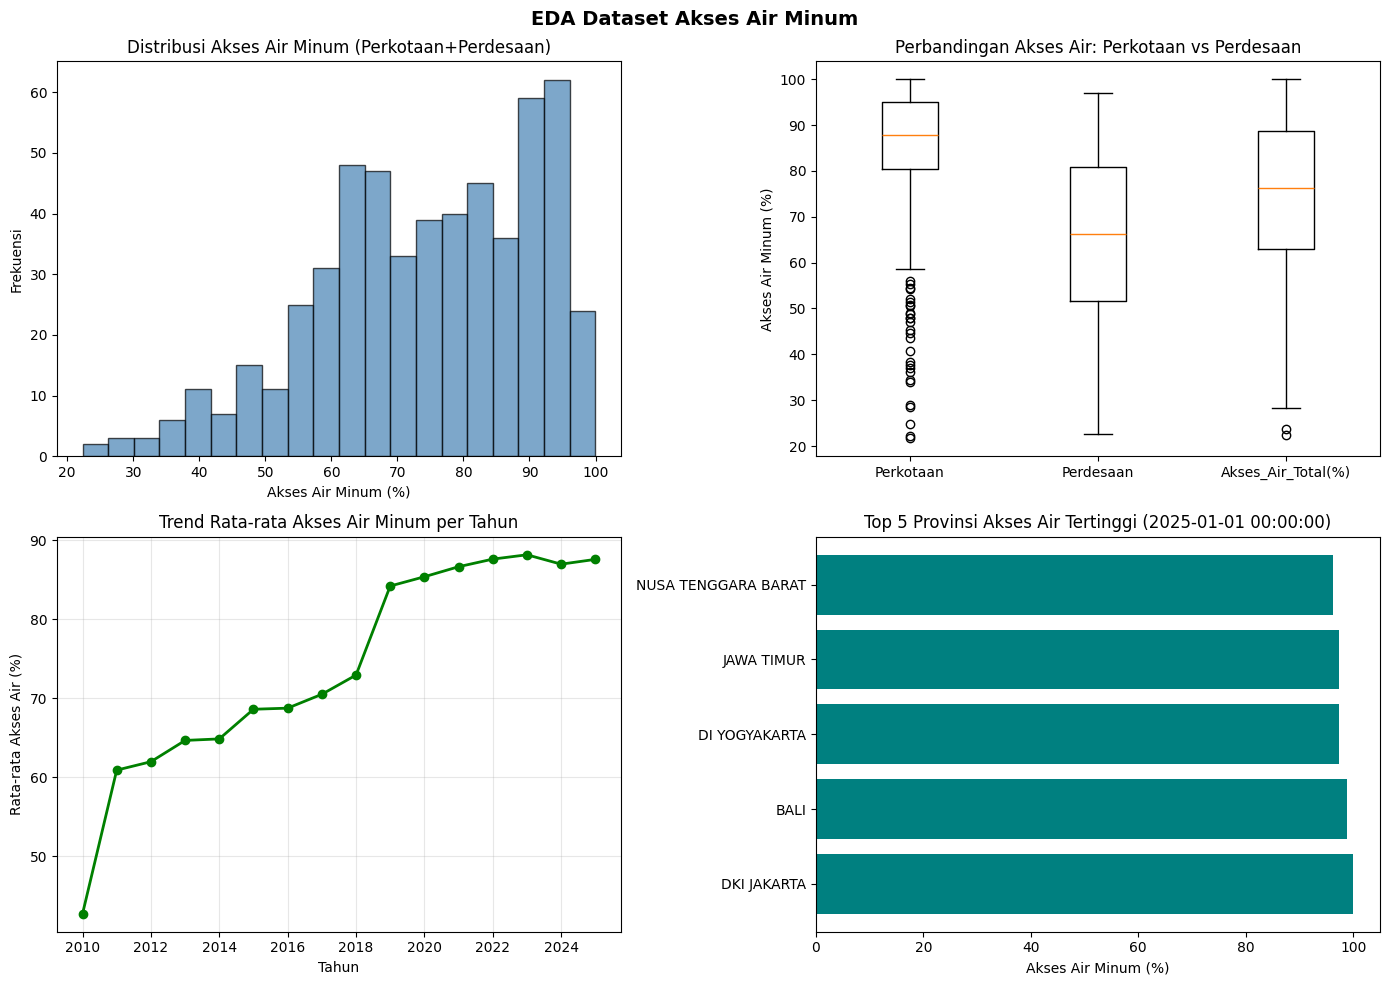

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================== EDA DATASET 1: AKSES AIR MINUM ==================
print("="*60)
print("EDA DATASET 1: AKSES AIR MINUM")
print("="*60)

# Info dasar
print("\n📊 INFORMASI DASAR:")
print(f"Shape: {air_eda.shape}")
print(f"Jumlah Provinsi: {air_eda['Provinsi'].nunique()}")
print(f"Rentang Tahun: {air_eda['Tahun'].min()} - {air_eda['Tahun'].max()}")

print("\n📋 TIPE DATA:")
print(air_eda.dtypes)

print("\n📈 STATISTIK DESKRIPTIF:")
print(air_eda.describe())

print("\n❌ MISSING VALUES:")
print(air_eda.isnull().sum())

# Visualisasi 1: Distribusi Akses Air Minum (Perkotaan+Perdesaan)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('EDA Dataset Akses Air Minum', fontsize=14, fontweight='bold')

# Histogram distribusi
axes[0, 0].hist(air_eda['Akses_Air_Total(%)'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Akses Air Minum (%)')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].set_title('Distribusi Akses Air Minum (Perkotaan+Perdesaan)')

# Boxplot perbandingan Perkotaan vs Perdesaan
data_box = [air_eda['Perkotaan'].dropna(), air_eda['Perdesaan'].dropna(), air_eda['Akses_Air_Total(%)'].dropna()]
axes[0, 1].boxplot(data_box, labels=['Perkotaan', 'Perdesaan', 'Akses_Air_Total(%)'])
axes[0, 1].set_ylabel('Akses Air Minum (%)')
axes[0, 1].set_title('Perbandingan Akses Air: Perkotaan vs Perdesaan')

# Trend rata-rata per tahun
trend_air = air_eda.groupby('Tahun')['Akses_Air_Total(%)'].mean()
axes[1, 0].plot(trend_air.index, trend_air.values, marker='o', color='green', linewidth=2)
axes[1, 0].set_xlabel('Tahun')
axes[1, 0].set_ylabel('Rata-rata Akses Air (%)')
axes[1, 0].set_title('Trend Rata-rata Akses Air Minum per Tahun')
axes[1, 0].grid(True, alpha=0.3)

# Top 5 Provinsi dengan akses tertinggi (tahun terbaru)
latest_year = air_eda['Tahun'].max()
top5 = air_eda[air_eda['Tahun'] == latest_year].nlargest(5, 'Akses_Air_Total(%)')
axes[1, 1].barh(top5['Provinsi'], top5['Akses_Air_Total(%)'], color='teal')
axes[1, 1].set_xlabel('Akses Air Minum (%)')
axes[1, 1].set_title(f'Top 5 Provinsi Akses Air Tertinggi ({latest_year})')

plt.tight_layout()
plt.show()

visualisasi di atas menunjukkan


EDA DATASET 2: CURAH HUJAN

📊 INFORMASI DASAR:
Shape: (608, 3)
Jumlah Provinsi: 38
Rentang Tahun: 2010-01-01 00:00:00 - 2025-01-01 00:00:00

📋 TIPE DATA:
Provinsi                  object
Tahun             datetime64[ns]
Curah_Hujan_mm           float64
dtype: object

📈 STATISTIK DESKRIPTIF:
                     Tahun  Curah_Hujan_mm
count                  608      608.000000
mean   2017-07-02 06:00:00        7.534210
min    2010-01-01 00:00:00        2.580959
25%    2013-10-01 18:00:00        5.956308
50%    2017-07-02 12:00:00        7.314715
75%    2021-04-02 06:00:00        8.739911
max    2025-01-01 00:00:00       19.762735
std                    NaN        2.245193

❌ MISSING VALUES:
Provinsi          0
Tahun             0
Curah_Hujan_mm    0
dtype: int64


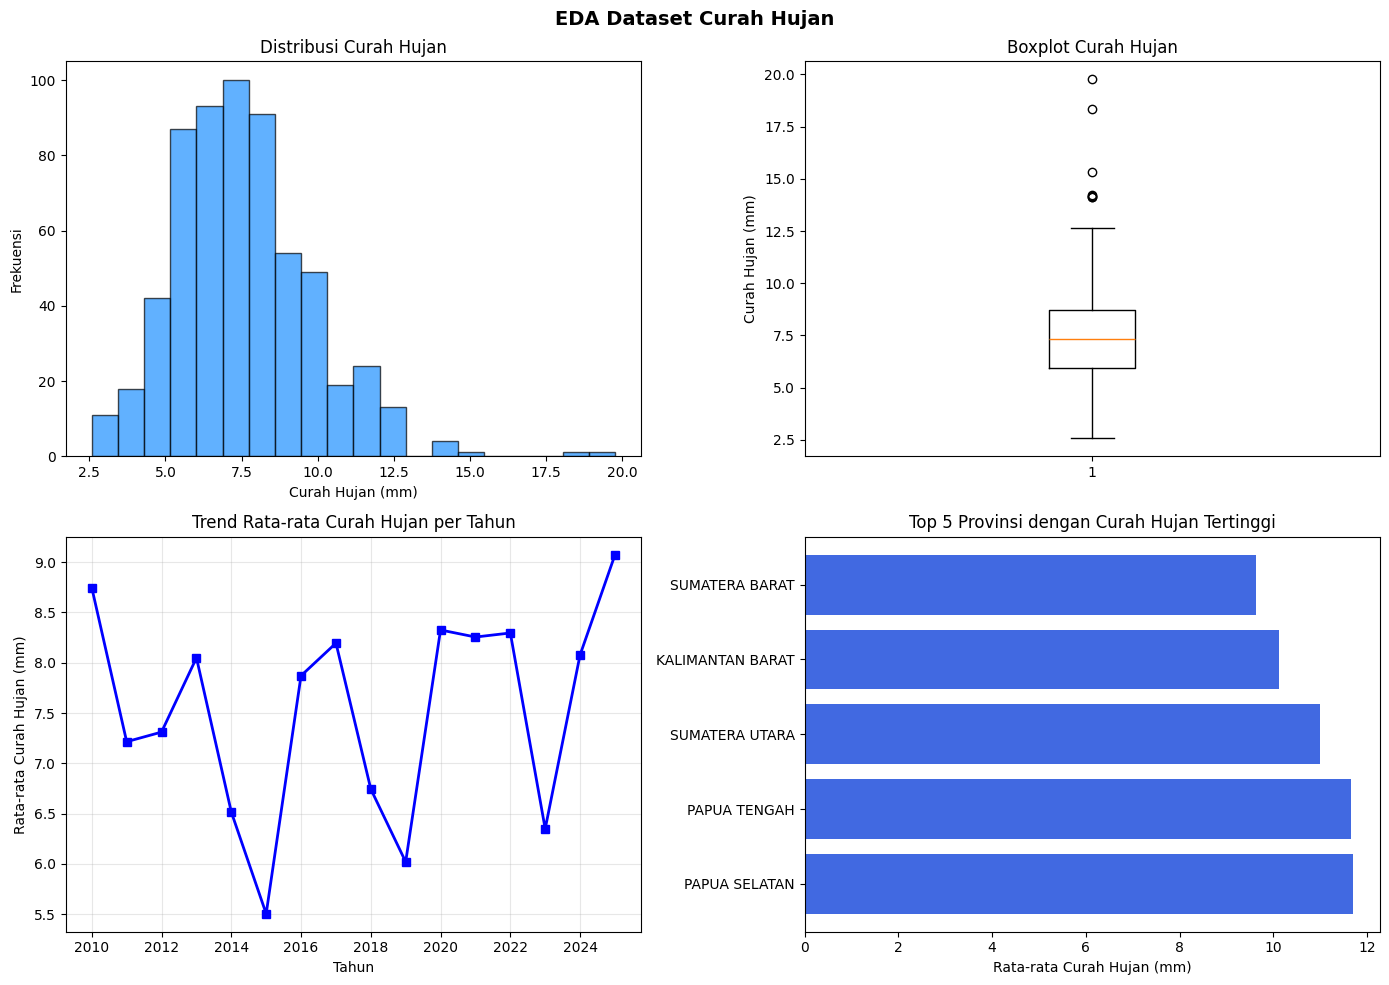

In [154]:
# ================== EDA DATASET 2: CURAH HUJAN ==================
print("\n" + "="*60)
print("EDA DATASET 2: CURAH HUJAN")
print("="*60)

print("\n📊 INFORMASI DASAR:")
print(f"Shape: {curah_hujan_eda.shape}")
print(f"Jumlah Provinsi: {curah_hujan_eda['Provinsi'].nunique()}")
print(f"Rentang Tahun: {curah_hujan_eda['Tahun'].min()} - {curah_hujan_eda['Tahun'].max()}")

print("\n📋 TIPE DATA:")
print(curah_hujan_eda.dtypes)

print("\n📈 STATISTIK DESKRIPTIF:")
print(curah_hujan_eda.describe())

print("\n❌ MISSING VALUES:")
print(curah_hujan_eda.isnull().sum())

# Visualisasi 2: Curah Hujan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('EDA Dataset Curah Hujan', fontsize=14, fontweight='bold')

# Histogram distribusi curah hujan
axes[0, 0].hist(curah_hujan_eda['Curah_Hujan_mm'], bins=20, color='dodgerblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Curah Hujan (mm)')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].set_title('Distribusi Curah Hujan')

# Boxplot curah hujan
axes[0, 1].boxplot(curah_hujan_eda['Curah_Hujan_mm'].dropna())
axes[0, 1].set_ylabel('Curah Hujan (mm)')
axes[0, 1].set_title('Boxplot Curah Hujan')

# Trend rata-rata curah hujan per tahun
trend_hujan = curah_hujan_eda.groupby('Tahun')['Curah_Hujan_mm'].mean()
axes[1, 0].plot(trend_hujan.index, trend_hujan.values, marker='s', color='blue', linewidth=2)
axes[1, 0].set_xlabel('Tahun')
axes[1, 0].set_ylabel('Rata-rata Curah Hujan (mm)')
axes[1, 0].set_title('Trend Rata-rata Curah Hujan per Tahun')
axes[1, 0].grid(True, alpha=0.3)

# Top 5 Provinsi dengan curah hujan tertinggi
top5_hujan = curah_hujan_eda.groupby('Provinsi')['Curah_Hujan_mm'].mean().nlargest(5)
axes[1, 1].barh(top5_hujan.index, top5_hujan.values, color='royalblue')
axes[1, 1].set_xlabel('Rata-rata Curah Hujan (mm)')
axes[1, 1].set_title('Top 5 Provinsi dengan Curah Hujan Tertinggi')

plt.tight_layout()
plt.show()

visualisasi di atas menunjukkan


EDA DATASET 3: KEPADATAN PENDUDUK

📊 INFORMASI DASAR:
Shape: (548, 3)
Jumlah Provinsi: 38
Rentang Tahun: 2010-01-01 00:00:00 - 2025-01-01 00:00:00

📋 TIPE DATA:
Provinsi                      object
Kepadatan_Penduduk             int64
Tahun                 datetime64[ns]
dtype: object

📈 STATISTIK DESKRIPTIF:
       Kepadatan_Penduduk                          Tahun
count          548.000000                            548
mean           717.970803  2017-08-24 13:42:28.905109504
min              5.000000            2010-01-01 00:00:00
25%             46.750000            2014-01-01 00:00:00
50%             99.000000            2018-01-01 00:00:00
75%            254.750000            2022-01-01 00:00:00
max          16165.000000            2025-01-01 00:00:00
std           2605.084757                            NaN

❌ MISSING VALUES:
Provinsi              0
Kepadatan_Penduduk    0
Tahun                 0
dtype: int64


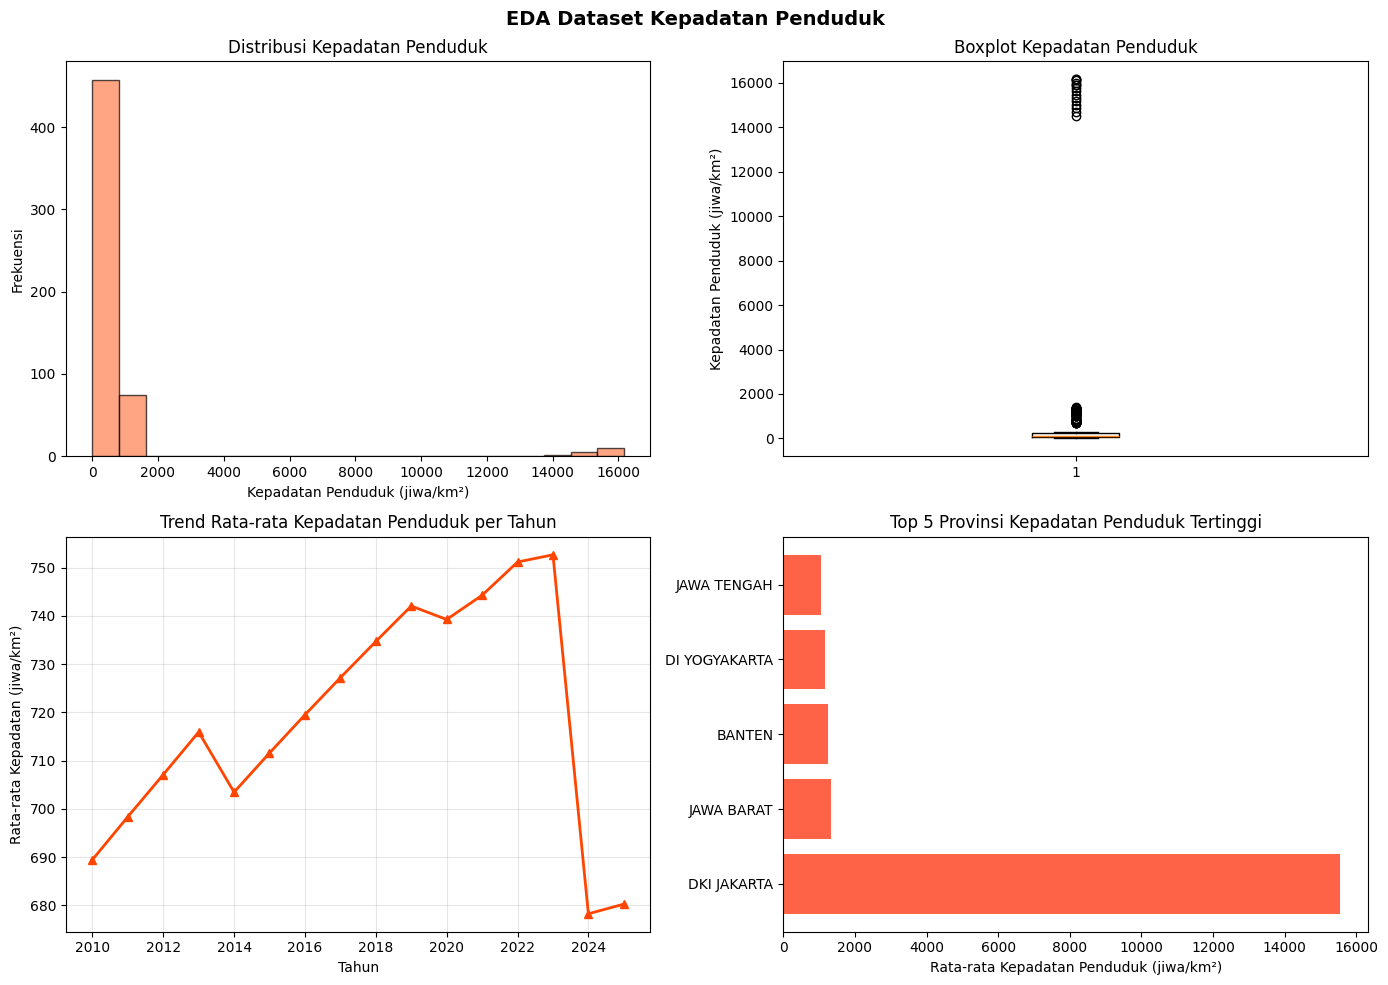

In [155]:

# ================== EDA DATASET 3: KEPADATAN PENDUDUK ==================
print("\n" + "="*60)
print("EDA DATASET 3: KEPADATAN PENDUDUK")
print("="*60)

print("\n📊 INFORMASI DASAR:")
print(f"Shape: {penduduk_eda.shape}")
print(f"Jumlah Provinsi: {penduduk_eda['Provinsi'].nunique()}")
print(f"Rentang Tahun: {penduduk_eda['Tahun'].min()} - {penduduk_eda['Tahun'].max()}")

print("\n📋 TIPE DATA:")
print(penduduk_eda.dtypes)

print("\n📈 STATISTIK DESKRIPTIF:")
print(penduduk_eda.describe())

print("\n❌ MISSING VALUES:")
print(penduduk_eda.isnull().sum())

# Visualisasi 3: Kepadatan Penduduk
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('EDA Dataset Kepadatan Penduduk', fontsize=14, fontweight='bold')

# Histogram distribusi kepadatan penduduk
axes[0, 0].hist(penduduk_eda['Kepadatan_Penduduk'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Kepadatan Penduduk (jiwa/km²)')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].set_title('Distribusi Kepadatan Penduduk')

# Boxplot kepadatan penduduk
axes[0, 1].boxplot(penduduk_eda['Kepadatan_Penduduk'].dropna())
axes[0, 1].set_ylabel('Kepadatan Penduduk (jiwa/km²)')
axes[0, 1].set_title('Boxplot Kepadatan Penduduk')

# Trend rata-rata kepadatan penduduk per tahun
trend_penduduk = penduduk_eda.groupby('Tahun')['Kepadatan_Penduduk'].mean()
axes[1, 0].plot(trend_penduduk.index, trend_penduduk.values, marker='^', color='orangered', linewidth=2)
axes[1, 0].set_xlabel('Tahun')
axes[1, 0].set_ylabel('Rata-rata Kepadatan (jiwa/km²)')
axes[1, 0].set_title('Trend Rata-rata Kepadatan Penduduk per Tahun')
axes[1, 0].grid(True, alpha=0.3)

# Top 5 Provinsi dengan kepadatan tertinggi
top5_penduduk = penduduk_eda.groupby('Provinsi')['Kepadatan_Penduduk'].mean().nlargest(5)
axes[1, 1].barh(top5_penduduk.index, top5_penduduk.values, color='tomato')
axes[1, 1].set_xlabel('Rata-rata Kepadatan Penduduk (jiwa/km²)')
axes[1, 1].set_title('Top 5 Provinsi Kepadatan Penduduk Tertinggi')

plt.tight_layout()
plt.show()



Berikan keterangan setiap visualisasi data yang dibuat

Gambar di atas merupakan grafik tren ....


In [158]:

# ================== RINGKASAN EDA ==================
print("\n" + "="*60)
print("📊 RINGKASAN EDA KETIGA DATASET")
print("="*60)
print(f"""
Dataset 1 - Akses Air Minum:
  • Total data: {len(air_eda)} baris
  • Provinsi: {air_eda['Provinsi'].nunique()} provinsi
  • Periode: {air_eda['Tahun'].min()} - {air_eda['Tahun'].max()}
  • Rata-rata akses air: {air_eda['Akses_Air_Total(%)'].mean():.2f}%

Dataset 2 - Curah Hujan:
  • Total data: {len(curah_hujan_eda)} baris
  • Provinsi: {curah_hujan_eda['Provinsi'].nunique()} provinsi
  • Periode: {curah_hujan_eda['Tahun'].min()} - {curah_hujan_eda['Tahun'].max()}
  • Rata-rata curah hujan: {curah_hujan_eda['Curah_Hujan_mm'].mean():.2f} mm

Dataset 3 - Kepadatan Penduduk:
  • Total data: {len(penduduk_eda)} baris
  • Provinsi: {penduduk_eda['Provinsi'].nunique()} provinsi
  • Periode: {penduduk_eda['Tahun'].min()} - {penduduk_eda['Tahun'].max()}
  • Rata-rata kepadatan: {penduduk_eda['Kepadatan_Penduduk'].mean():.2f} jiwa/km²
""")


📊 RINGKASAN EDA KETIGA DATASET

Dataset 1 - Akses Air Minum:
  • Total data: 608 baris
  • Provinsi: 38 provinsi
  • Periode: 2010-01-01 00:00:00 - 2025-01-01 00:00:00
  • Rata-rata akses air: 74.25%

Dataset 2 - Curah Hujan:
  • Total data: 608 baris
  • Provinsi: 38 provinsi
  • Periode: 2010-01-01 00:00:00 - 2025-01-01 00:00:00
  • Rata-rata curah hujan: 7.53 mm

Dataset 3 - Kepadatan Penduduk:
  • Total data: 548 baris
  • Provinsi: 38 provinsi
  • Periode: 2010-01-01 00:00:00 - 2025-01-01 00:00:00
  • Rata-rata kepadatan: 717.97 jiwa/km²



# Preprocessing Data

SOAL 4. Berikan deskripsi data pre-processing yang dilakukan

1.

2.

3.

4.

dst

In [59]:
# Kode Data Cleaning 

# Normalisasi nama provinsi agar konsisten
air['Provinsi'] = air['Provinsi'].str.upper().str.strip()
curah_hujan['Provinsi'] = curah_hujan['Provinsi'].str.upper().str.strip()
penduduk['Provinsi'] = penduduk['Provinsi'].str.upper().str.strip()


# Menggabungkan data akses air minum dengan data curah hujan dan kpepadatan penduduk
df = pandas.merge(air, curah_hujan, on=['Provinsi', 'Tahun'], how='inner')
df = pandas.merge(df, penduduk, on=['Provinsi', 'Tahun'], how='inner')

cols = ['Tahun', 'Provinsi', 'Perkotaan+Perdesaan', 'Curah_Hujan_mm', 'Kepadatan_Penduduk']
df = df[cols].sort_values(['Provinsi', 'Tahun'])
df = df.rename(columns={'Perkotaan+Perdesaan': 'Akses_Air(%)', 'Curah_Hujan_mm': 'Curah_Hujan(mm)', 'Kepadatan_Penduduk': 'Kepadatan_Penduduk(jiwa/km2)'})


print(df.head().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tahun                         5 non-null      int64  
 1   Provinsi                      5 non-null      object 
 2   Akses_Air(%)                  5 non-null      object 
 3   Curah_Hujan(mm)               5 non-null      float64
 4   Kepadatan_Penduduk(jiwa/km2)  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes
None


In [ ]:
# Pastikan Tahun dalam format datetime
df['Tahun'] = pandas.to_datetime(df['Tahun'], format='%Y')
df['Kepadatan_Penduduk(jiwa/km2)'] = df['Kepadatan_Penduduk(jiwa/km2)'].astype(float)
df['Akses_Air(%)'] = df['Akses_Air(%)'].astype(str).str.replace('%', '').str.replace(',', '.')

cols_numerik = ['Akses_Air(%)', 'Curah_Hujan(mm)', 'Kepadatan_Penduduk(jiwa/km2)']
for col in cols_numerik:
    df[col] = pandas.to_numeric(df[col], errors='coerce')

df = df.set_index('Tahun')
print(f"{df.info()}\n")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2010-01-01 to 2025-01-01
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provinsi                      516 non-null    object 
 1   Akses_Air(%)                  515 non-null    float64
 2   Curah_Hujan(mm)               516 non-null    float64
 3   Kepadatan_Penduduk(jiwa/km2)  516 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.2+ KB
None

           Provinsi  Akses_Air(%)  Curah_Hujan(mm)  \
Tahun                                                
2010-01-01     ACEH         29.02         9.760027   
2011-01-01     ACEH         57.66         8.113918   
2012-01-01     ACEH         56.05         7.047022   
2013-01-01     ACEH         60.76         7.426932   
2014-01-01     ACEH         58.74         9.255836   

            Kepadatan_Penduduk(jiwa/km2)  
Tahun                                     

In [65]:
# Simpan dataset yang sudah bersih
df.to_csv('dataset_merged.csv')

# Feature Engineering & Data Augmentasi

SOAL 5. Defenisikan Feature engineering  dan Data Augmentasi


-- Strategi Desain GST untuk Dataset Kecil
Shallow Transformer (2–4 layers),
Latent dimension kecil (z ≤ 16), dan
Sequence-level latent (bukan token-level)

3.2 Data Augmentation / Synthetic Data dengan menggunakan:
Augmentasi domain-spesifik
Pre-generate synthetic samples



In [ ]:
# 4. Upsampling ke Bulanan (MS) per Provinsi
# Kita hanya ambil kolom numerik agar tidak muncul TypeError lagi
df_monthly = df.groupby('Provinsi')[cols_numerik].resample('MS').mean()

# 5. Interpolasi Linear untuk mengisi gap antar bulan
df_monthly = df_monthly.interpolate(method='linear').reset_index()
df_monthly['Kepadatan_Penduduk(jiwa/km2)'] = df_monthly['Kepadatan_Penduduk(jiwa/km2)'].round().astype(int)

print(f"Jumlah data sekarang: {len(df_monthly)}")
print(df_monthly.head())

In [ ]:
df_monthly.to_csv('augmented_dataset.csv')

In [68]:
# Feature engineering: lags, rolling
# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_monthly[cols_numerik])

def create_multivariate_sequences(data, input_len=12, pred_len=1):
    X, Y = [] , []
    for i in range(len(data) - input_len - pred_len + 1):
        # Mengambil semua 3 fitur: [Akses_Air, Hujan, Penduduk]
        X.append(data[i : i + input_len, :]) 
        
        # Mengambil hanya target: Akses_Air (berada di kolom indeks 0)
        Y.append(data[i + input_len : i + input_len + pred_len, 0])
        
    return numpy.array(X), numpy.array(Y)

# Cara pakainya setelah data lu di-scaling:
# X shape: (Jumlah_Sampel, 12, 3)
# Y shape: (Jumlah_Sampel, 1)
X, Y = create_multivariate_sequences(scaled_data, input_len=12, pred_len=1)

# Convert ke Tensor
X_train = torch.FloatTensor(X)
Y_train = torch.FloatTensor(Y)

print(f"Shape X: {X_train.shape}") # [Batch, Seq_Len, Features]



Shape X: torch.Size([5784, 12, 3])


SOAL 6. Apa itu Data splitting mengapa harus displitting?

Berikan keterangan tentang hasil data splitting yang dilakukan

In [159]:
from sklearn.model_selection import train_test_split

# Membagi data (80% Train, 20% Test)
# X dan Y diambil dari output create_multivariate_sequences sebelumnya
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, Y, test_size=0.2, shuffle=False
)

# Konversi ke Tensor PyTorch
X_train = torch.FloatTensor(X_train_np)
y_train = torch.FloatTensor(y_train_np)
X_test = torch.FloatTensor(X_test_np)
y_test = torch.FloatTensor(y_test_np)

print(f"Jumlah Data Train: {X_train.shape[0]}")
print(f"Jumlah Data Test: {X_test.shape[0]}")

Jumlah Data Train: 4627
Jumlah Data Test: 1157


# Modelling

--
--
SOAL 7. Tuliskan tentang algoritma yang dipilih disini dan karakteristiknya

Jawaban:

SOAL 8. Apakah Jenis dataset sesuai dengan karakteristik algoritma yang dipilih?

Jawaban:

--
---

In [160]:
class Encoder(nn.Module):
    def __init__(self, input_dim=3, d_model=64, nhead=4):
        super().__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)

    def forward(self, x):
        x = self.embedding(x)
        out = self.encoder(x)
        return out[:, -1, :]

class LatentLayer(nn.Module):
    def __init__(self, d_model=64, latent_dim=16):
        super().__init__()
        self.mu = nn.Linear(d_model, latent_dim)
        self.logvar = nn.Linear(d_model, latent_dim)

    def forward(self, h):
        mu = self.mu(h)
        logvar = self.logvar(h)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z, mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim=16, d_model=64, pred_len=1): 
        super().__init__()
        self.fc = nn.Linear(latent_dim, d_model)
        self.output = nn.Linear(d_model, pred_len)

    def forward(self, z):
        h = torch.relu(self.fc(z))
        return self.output(h)

class GST(nn.Module):
    def __init__(self, input_dim=3, latent_dim=16, d_model=64):
        super().__init__()
        self.encoder = Encoder(input_dim, d_model)
        self.latent = LatentLayer(d_model, latent_dim)
        self.decoder = Decoder(latent_dim, d_model)

    def forward(self, x):
        h = self.encoder(x)
        z, mu, logvar = self.latent(h)
        y_hat = self.decoder(z)
        return y_hat, mu, logvar

# Inisialisasi Model
model = GST(input_dim=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [161]:
# Train model dengan early stopping
def elbo_loss(y_hat, y, mu, logvar):
    # 1. Reconstruction Loss (MSE)
    mse_loss = criterion(y_hat, y)
    # 2. KL Divergence (Regulasi agar distribusi laten normal)
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse_loss + 0.01 * kl_loss # Beta factor 0.01

epochs = 100
history = []

model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat, mu, logvar = model(X_train)
    
    loss = elbo_loss(y_hat, y_train, mu, logvar)
    loss.backward()
    optimizer.step()
    
    history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

plt.plot(history)
plt.title("Training Loss (ELBO)")
plt.show()

KeyboardInterrupt: 

# Evaluasi

Soal 9. Tuliskan evaluasi apasaja yang dilakukan semakin lengkap semakin baik (minimal 6 jenis evaluasi)

----- Evaluasi GST biasanya menggunakan----

Log-likelihood / ELBO

Diversity metrics

CRPS, NLL (forecasting)

Multiple-sample evaluation

Task-specific metrics (FID, SSIM untuk gambar)

In [ ]:
# kode evaluasi
model.eval()
with torch.no_grad():
    # Lakukan sampling 10x untuk mendapatkan distribusi
    samples = []
    for _ in range(10):
        y_pred, _, _ = model(X_test)
        samples.append(y_pred.numpy())
    
    samples = np.array(samples)
    y_mean = samples.mean(axis=0)
    y_std = samples.std(axis=0)

# Evaluasi sederhana (MSE pada nilai rata-rata)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_np, y_mean)
mae = mean_absolute_error(y_test_np, y_mean)

print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")

# Visualisasi Hasil
plt.figure(figsize=(12, 6))
plt.plot(y_test_np[:100], label="Data Asli", color='black')
plt.plot(y_mean[:100], label="Prediksi (Mean)", color='blue')
plt.fill_between(range(100), 
                 (y_mean - 1.96 * y_std).flatten()[:100], 
                 (y_mean + 1.96 * y_std).flatten()[:100], 
                 color='blue', alpha=0.2, label="Uncertainty (95% CI)")
plt.legend()
plt.title("Forecasting Akses Air Bersih dengan Uncertainty (GST)")
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Metrik Akurasi Standar
rmse = np.sqrt(mean_squared_error(y_test_np, y_mean))
r2 = r2_score(y_test_np, y_mean)

# 2. Continuous Ranked Probability Score (CRPS) - Estimasi sederhana
# Mengukur seberapa dekat distribusi prediksi dengan nilai asli
def calculate_crps(y_true, y_samples):
    # y_samples shape: [n_samples, n_points]
    n_samples = y_samples.shape[0]
    # Istilah pertama: Mean Absolute Error dari sampel ke true
    term_1 = np.mean(np.abs(y_samples - y_true), axis=0)
    # Istilah kedua: Mean Absolute Difference antar sampel (Internal Variance)
    # Kita estimasi dengan rata-rata jarak antar pasangan sampel
    term_2 = 0
    for i in range(n_samples):
        for j in range(n_samples):
            term_2 += np.abs(y_samples[i] - y_samples[j])
    term_2 /= (2 * n_samples * n_samples)
    return np.mean(term_1 - term_2)

crps_val = calculate_crps(y_test_np.flatten(), samples.squeeze())

# 3. Prediction Interval Coverage Probability (PICP)
# Mengecek apakah 95% data asli benar-benar masuk dalam rentang 95% CI kita
lower_bound = y_mean - 1.96 * y_std
upper_bound = y_mean + 1.96 * y_std
within_interval = (y_test_np >= lower_bound) & (y_test_np <= upper_bound)
picp = np.mean(within_interval)

# 4. Mean Prediction Interval Width (MPIW)
# Mengukur seberapa "lebar" atau "tajam" ketidakpastian kita
mpiw = np.mean(upper_bound - lower_bound)

print("="*40)
print("📊 EVALUASI MODEL STOKASTIK (GST)")
print("="*40)
print(f"RMSE (Akurasi)           : {rmse:.6f}")
print(f"R-Squared (Variansi)     : {r2:.6f}")
print(f"CRPS (Probabilistik)     : {crps_val:.6f} (Makin kecil makin baik)")
print(f"PICP (Cakupan 95% CI)    : {picp*100:.2f}% (Target: Dekat 95%)")
print(f"MPIW (Lebar Ketidakpastian): {mpiw:.6f} (Makin kecil makin tajam)")

Keterangan hasil evaluasi

# Forecasting

In [ ]:

# Visualisasi Residual (Error)
residuals = y_test_np - y_mean

plt.figure(figsize=(12, 5))

# Plot 1: Histogram Residual
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, color='gray', edgecolor='black')
plt.title("Distribusi Error (Residual)")
plt.xlabel("Error")

# Plot 2: Scatter Plot Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test_np, y_mean, alpha=0.5, color='blue')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.title("Actual vs Predicted")
plt.xlabel("Data Asli")
plt.ylabel("Prediksi")

plt.tight_layout()
plt.show()

In [ ]:
# Simpan Output


10. keterangan hasil prediksi

# Kesimpulan

Soal 11. HASIL KESIMPULAN

Berdasarkan hasil evaluasi ......